# 결측치, 이상치 검토하기


In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

missing_values = df.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

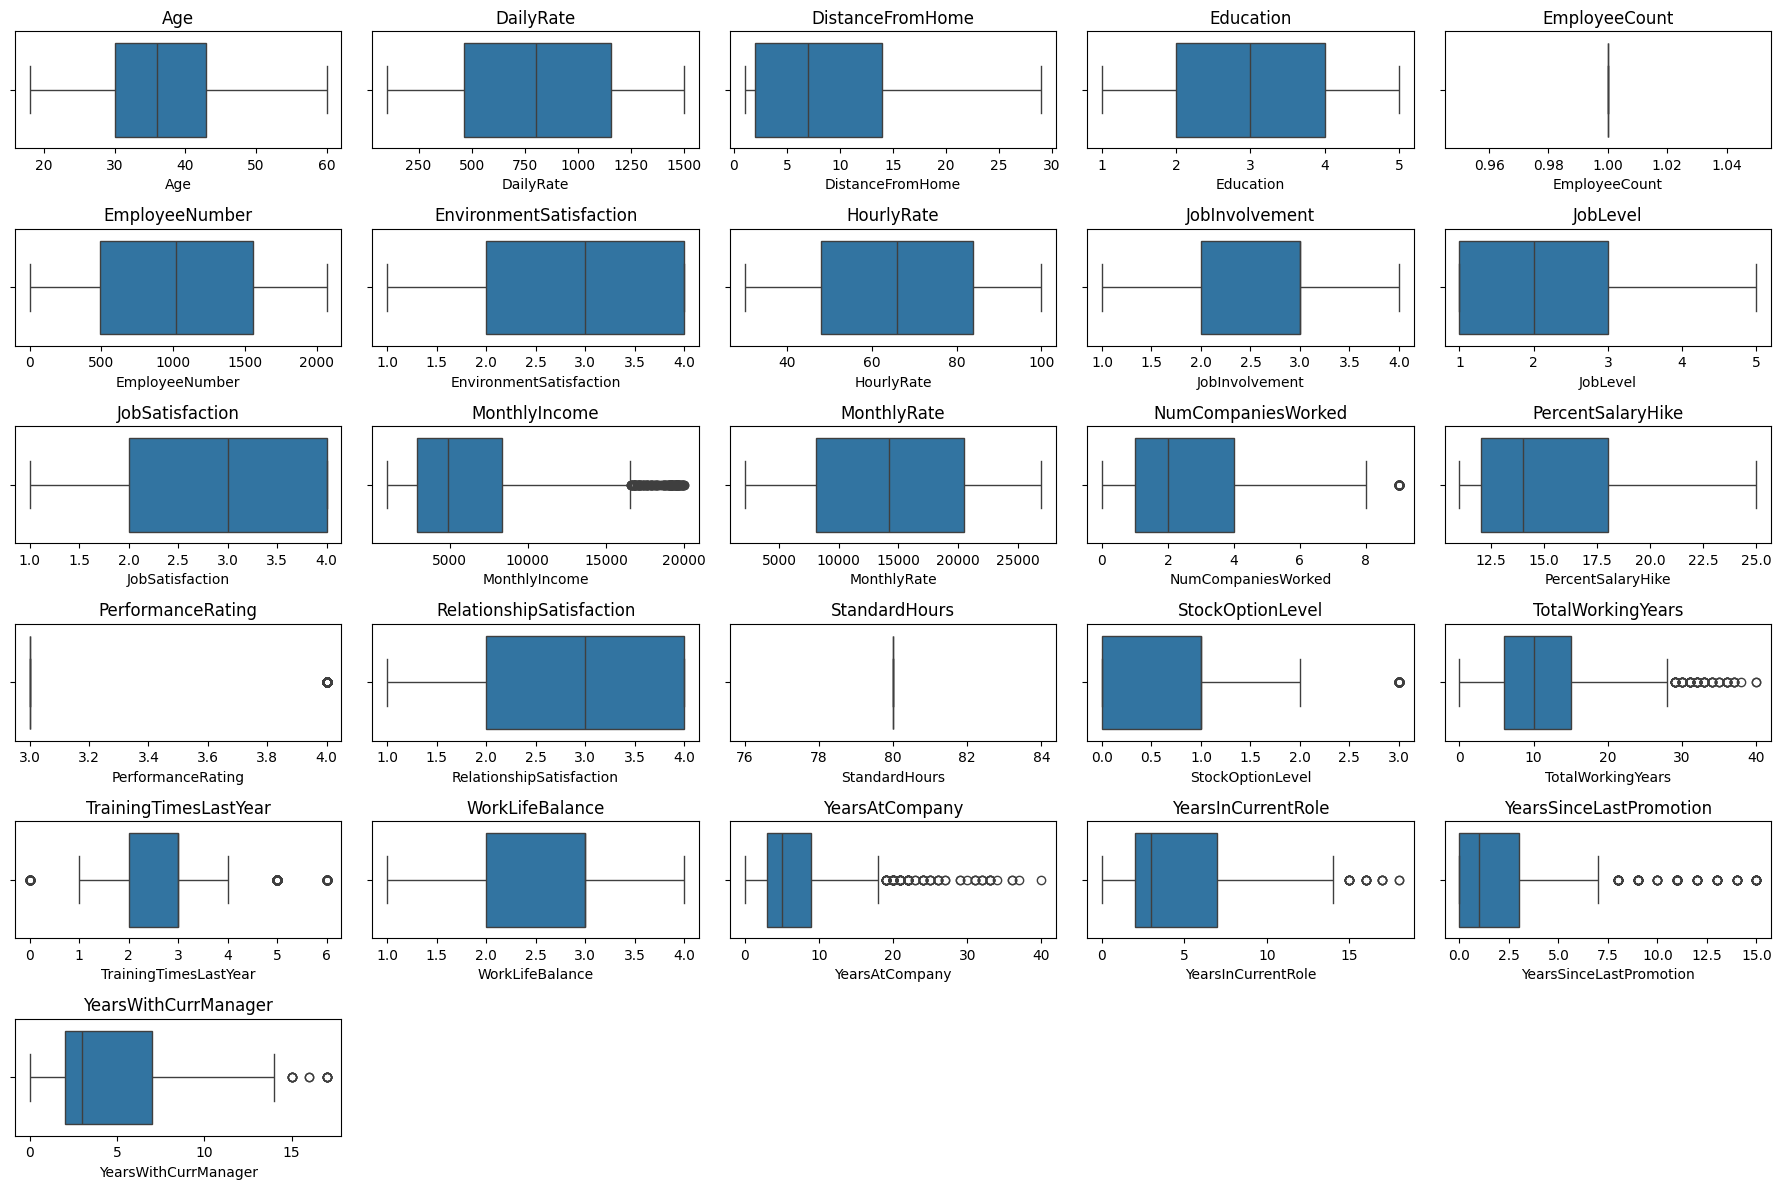

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

# 유의미한 시각화 5개 이상 수행하기

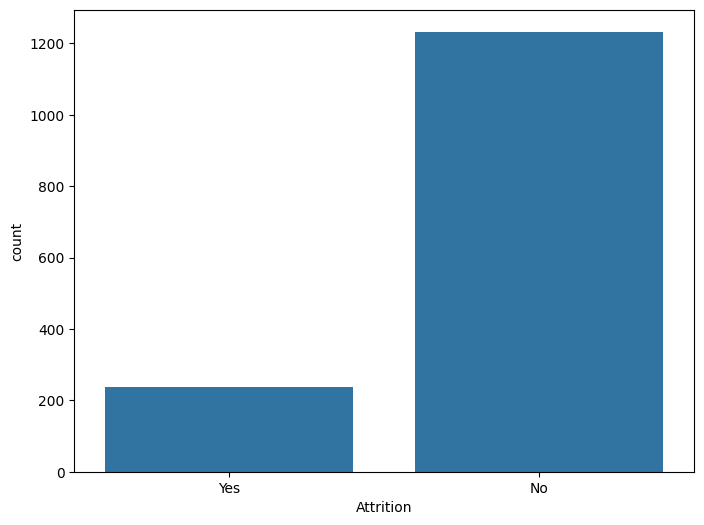

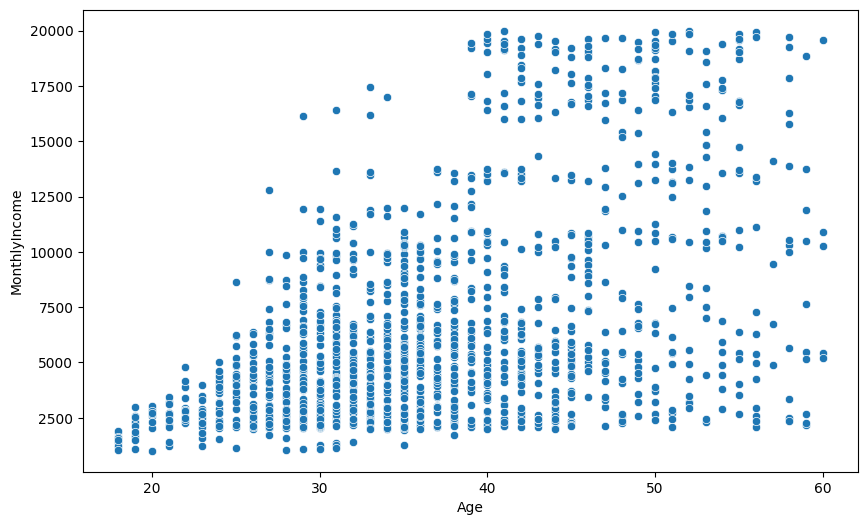

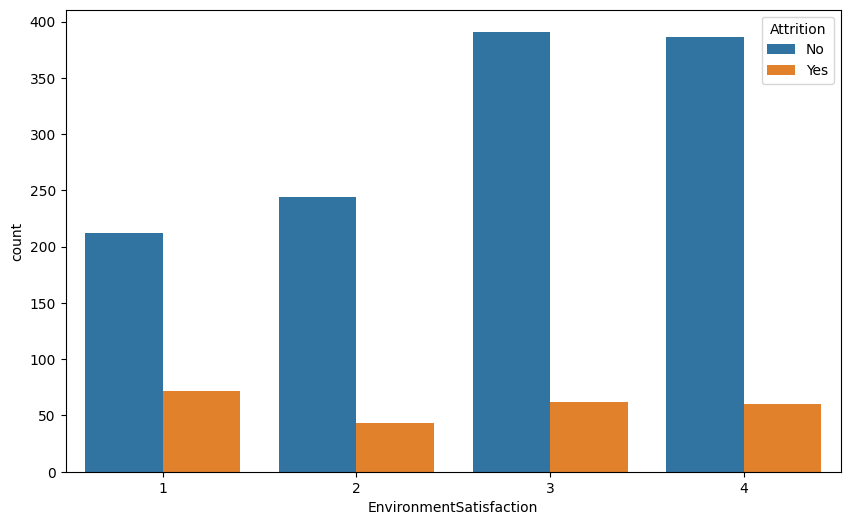

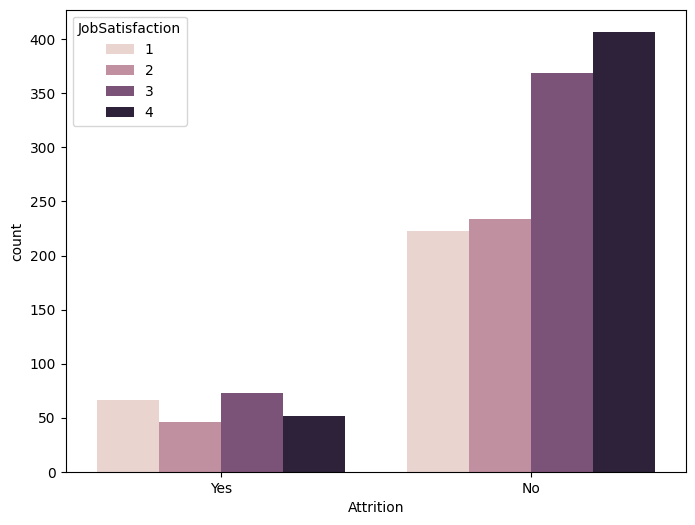

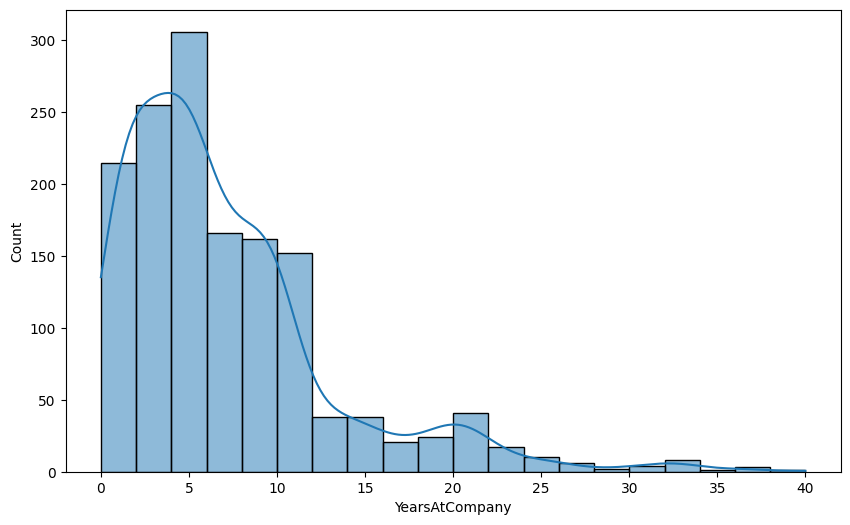

In [24]:
# 1. Attrition에 따른 인원 분포
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.show()

# 2. 연령에 따른 월급 수준
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)
plt.show()

# 3. 직원 이탈 여부에 따른 근무 환경 만족도
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.show()

# 4. Job Satisfaction에 따른 퇴사 비율
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', hue='JobSatisfaction', data=df)
plt.show()

# 5. 근속 연수에 따른 인원 분포
plt.figure(figsize=(10, 6))
sns.histplot(x='YearsAtCompany', data=df, bins=20, kde=True)
plt.show()


# 수치형 변수 간 상관관계 파악하기

<ipython-input-22-bb24d721ed84>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


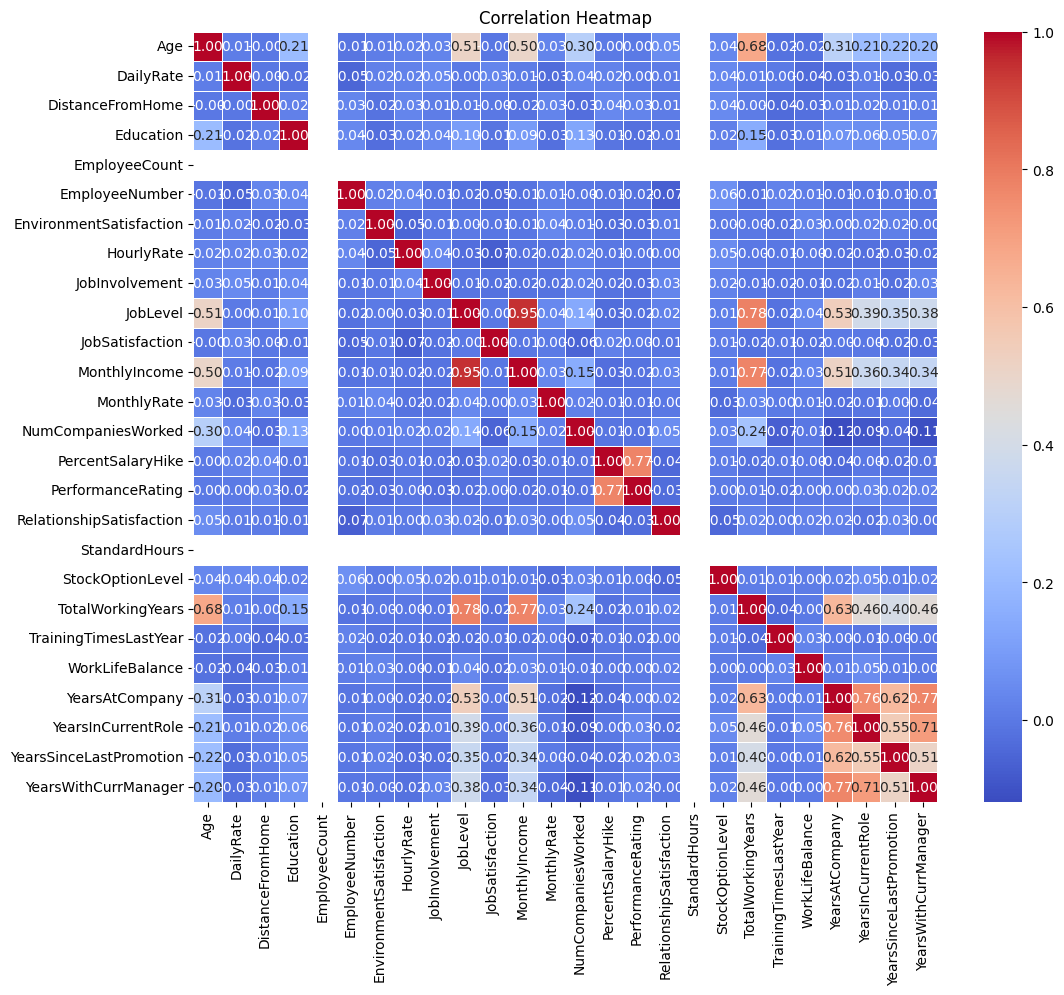

In [22]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#파생변수 생성하기

In [25]:
df['TotalYearsWithCurrentManager'] = df['YearsAtCompany'] + df['YearsInCurrentRole'] + df['YearsSinceLastPromotion']
print(df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'TotalYearsWithCurrentManager']].head())


   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                   4                        0   
1              10                   7                        1   
2               0                   0                        0   
3               8                   7                        3   
4               2                   2                        2   

   TotalYearsWithCurrentManager  
0                            10  
1                            18  
2                             0  
3                            18  
4                             6  
